# Homework 6

## Parker George
### February 28, 2025

# Problem 1

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize

In [82]:
all_data = np.loadtxt('hw6_data.txt', delimiter=',', skiprows=2)

data1 = all_data[:,0]
data2 = all_data[:,1]
time = all_data[:,2]

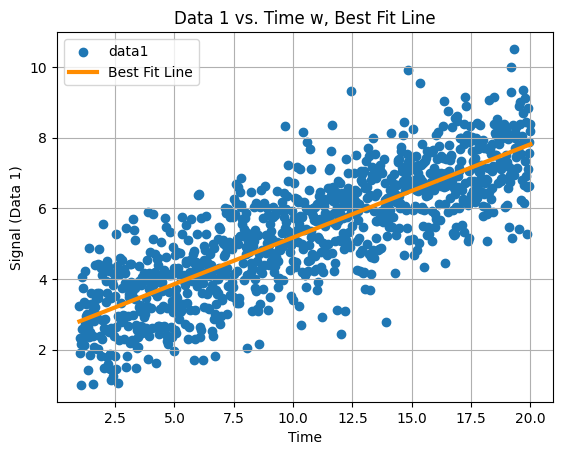

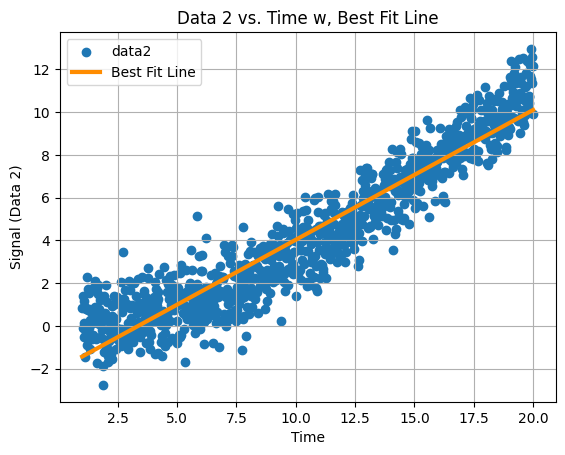

In [104]:
slope1, intercept1, _, _, _ = stats.linregress(time, data1)
slope2, intercept2, _, _, _ = stats.linregress(time, data2)

line1 = slope1 * time + intercept1
line2 = slope2 * time + intercept2

# Data 1 Plot
plt.scatter(time, data1, label='data1')
plt.plot(time, line1, label='Best Fit Line', c='darkorange', linewidth=3)
plt.title('Data 1 vs. Time w, Best Fit Line')
plt.xlabel('Time')
plt.ylabel('Signal (Data 1)')
plt.legend()
plt.grid(True)
plt.show()

# Data 2 Plot
plt.scatter(time, data2, label='data2')
plt.plot(time, line2, label='Best Fit Line', c='darkorange', linewidth=3)
plt.title('Data 2 vs. Time w, Best Fit Line')
plt.xlabel('Time')
plt.ylabel('Signal (Data 2)')
plt.legend()
plt.grid()
plt.show()

In [105]:
# Compute Summations: if these values are large then our fit is not good for our data
sum_data1 = np.sum((data1-line1)**2)
sum_data2 = np.sum((data2-line2)**2)
sum_data1, sum_data2

(np.float64(1059.6311219255517), np.float64(1381.1098361191227))

In [115]:
# Compute a and gamma for power law
def power_law(a,gamma):
    return a*time**gamma

pwr_min = minimize(lambda x: np.sum((data2-power_law(x[0],x[1]))**2),[1,1], method="Nelder-mead",tol=1e-6)
a_val, gamma_val = minimize(lambda x: np.sum((data2-power_law(x[0],x[1]))**2),[1,1], method="Nelder-mead",tol=1e-6)['x']
print(a_val, gamma_val)

0.05861271143467231 1.7588688501528043        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1019.7059768727361
             x: [ 5.861e-02  1.759e+00]
           nit: 105
          nfev: 197
 final_simplex: (array([[ 5.861e-02,  1.759e+00],
                       [ 5.861e-02,  1.759e+00],
                       [ 5.861e-02,  1.759e+00]]), array([ 1.020e+03,  1.020e+03,  1.020e+03]))


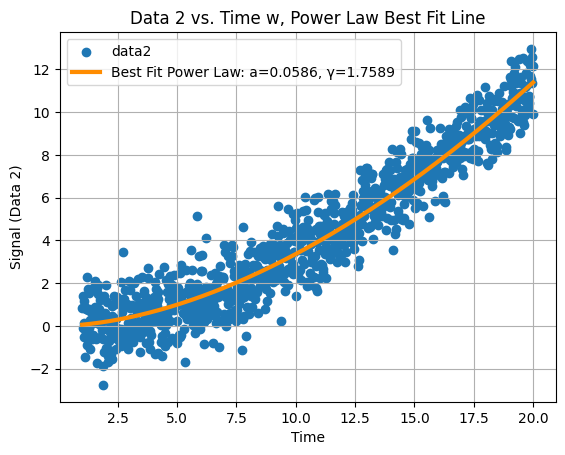

In [111]:
# Plot power law best fit
pwr_fit = power_law(a_val,gamma_val)

pwr_noise = np.sum((data2-pwr_fit)**2)

# Data 2 Power Law Best Fit
plt.scatter(time, data2, label='data2')
plt.plot(time, pwr_fit, label=f"Best Fit Power Law: a={a_val:.4f}, γ={gamma_val:.4f}", color="darkorange", linewidth=3)
plt.title('Data 2 vs. Time w, Power Law Best Fit Line')
plt.xlabel('Time')
plt.ylabel('Signal (Data 2)')
plt.legend()
plt.grid()
plt.show()

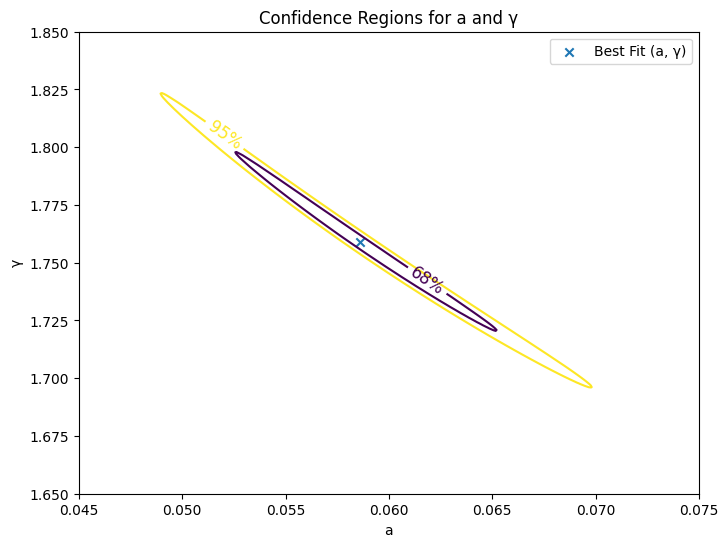

In [153]:
# Find the 1 sigma and 2 sigma regions for a and gamma

def chi_squared(a,gamma): # New function to help with meshgrid creation
    model = power_law(a, gamma)
    residuals = data2 - model
    return np.sum(residuals**2)


# Find our zero value
pwr0 = pwr_min['fun']

pwr68 = pwr0+2.3
pwr95 = pwr0+6.18

# Create a Meshgrid
a_mesh = np.linspace(0.045,0.075,300)
gamma_mesh = np.linspace(1.65,1.85,300)
A,G = np.meshgrid(a_mesh,gamma_mesh, indexing='ij')

chimesh = np.zeros(A.shape, dtype=float)

for i in range(len(a_mesh)):
    for j in range(len(gamma_mesh)):
        chimesh[i,j] = chi_squared(A[i,j],G[i,j])

# Plot confidence regions for power law [Dead Center]
plt.figure(figsize=(8, 6))
contour = plt.contour(A, G, chimesh, levels=[pwr68, pwr95])
plt.clabel(contour, fmt={pwr68: "68%", pwr95: "95%"}, fontsize=12)
plt.scatter(a_val, gamma_val, marker='x', label='Best Fit (a, γ)')
plt.title('Confidence Regions for a and γ')
plt.xlabel('a')
plt.ylabel('γ')
plt.legend()
plt.show()

# Problem 2



In [227]:
# Define our Signal and Noise Functions
def signal(t, a, b):
    return a*t + 0.5*b*t**2

def noise(t):
    return 0.5*t**2

In [228]:
# Generate Data
time = np.linspace(0.1,100,50)
a_true, b_true = 100, 9.8
noise_vals = np.random.randn(len(time)) * noise(time)
data = signal(time, a_true, b_true) + noise_vals

In [229]:
# Chi Squared correct
def correct(a,b):
    return np.sum(((data-signal(time,a,b))**2) / noise(time)**2)

# Chi Squared incorrect
def incorrect(a,b):
    return np.sum((data-signal(time,a,b))**2)

In [230]:
# Minimize
result_correct = minimize(lambda x: correct(x[0],x[1]), [0,1], method="Nelder-mead", tol=1e-6)
result_incorrect = minimize(lambda x: incorrect(x[0],x[1]), [0,1], method="Nelder-mead", tol=1e-6)
print(result_correct, result_incorrect)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 46.47706921015674
             x: [ 1.000e+02  9.790e+00]
           nit: 112
          nfev: 217
 final_simplex: (array([[ 1.000e+02,  9.790e+00],
                       [ 1.000e+02,  9.790e+00],
                       [ 1.000e+02,  9.790e+00]]), array([ 4.648e+01,  4.648e+01,  4.648e+01]))        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 239674458.729487
             x: [ 8.265e+01  1.035e+01]
           nit: 121
          nfev: 226
 final_simplex: (array([[ 8.265e+01,  1.035e+01],
                       [ 8.265e+01,  1.035e+01],
                       [ 8.265e+01,  1.035e+01]]), array([ 2.397e+08,  2.397e+08,  2.397e+08]))


In [231]:

# Extract A and B values from our minimization
a_correct, b_correct = result_correct.x
a_incorrect, b_incorrect = result_incorrect.x

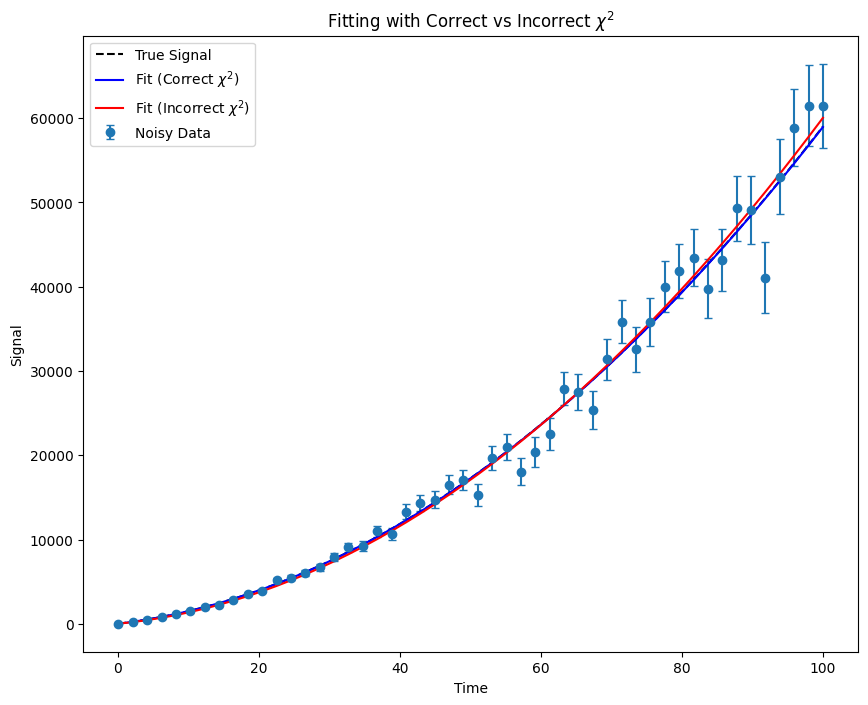

True parameters: a = 100, b = 9.8
Correct Chi2 Fit: a = 100.027, b = 9.790
Incorrect Chi2 Fit: a = 82.647, b = 10.355


In [235]:
# Plot the correct and incorrect fits
plt.figure(figsize=(10, 8))
plt.errorbar(time, data, yerr=noise(time), fmt='o', label='Noisy Data', capsize=3)

plt.plot(time, signal(time, a_true, b_true), 'k--', label='True Signal')
plt.plot(time, signal(time, a_correct, b_correct), 'b-', label=r'Fit (Correct $\chi^2$)')
plt.plot(time, signal(time, a_incorrect, b_incorrect), 'r-', label=r'Fit (Incorrect $\chi^2$)')

plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend()
plt.title(r'Fitting with Correct vs Incorrect $\chi^2$')
plt.show()

# Print results
print(f"True parameters: a = {a_true}, b = {b_true}")
print(f"Correct Chi2 Fit: a = {a_correct:.3f}, b = {b_correct:.3f}")
print(f"Incorrect Chi2 Fit: a = {a_incorrect:.3f}, b = {b_incorrect:.3f}")


# Problem 3

So I mentioned this to Professor Green Thursday after class, but I will go ahead and explain what I asked him if I could do for a final project. So I am currently taking ASTR 150 as a major requirement, and the two classes have quite a bit of overlap because we heavily use python to do our data reductions and so forth in our lab. So I asked professor Green if I could use our final lab project for ASTR 150 for the final project for this course. He said it would be ok as long as the python was done well, as per the scale of this course. I will provide a brief description of what I will be coding for this lab and how it compares to this course.

Description:
After taking images using the Nickel telescope of a chosen asteroid, I will:
1) Read FITS files from the Direct Imaging Camera on the Nickel telescope and display the data using the Python library;
2) Reduce the CCD images using dark and flat field frames;
3) Compare the reduced image with the digital sky survey;
4) Measure the positions of the stars in your CCD image;
5) Cross-correlate the stars in the image with those in the USNO B-1 star catalog;
6) Compute the “standard coordinates” for the USNO B-1 stars and match the two lists;
7) Perform a linear least squares fit to find the “plate constants”;
8) Examine the residuals between the measurements and the fit;
9) Use Python to compute the position (and associated errors) of the asteroid;
10) Determine your observed asteroid’s proper motion (i.e., arcsec per hour) and its measured error, and generate figure(s) that illustrates its observed motion on the plane of the sky.

I will also be sharing this with Prof Green to get his final approval.